In [2]:
!pip install folium

In [13]:
import pandas as pd
import numpy as np
import random
import folium
from folium import plugins
from datetime import datetime





In [14]:
def cria_df():
    data =np.array([['Norte','Icomp', 'Andar-1','AP 01', -3.08849503158679,-59.964605800152746],
                ['Norte','Icomp', 'Andar-1','AP 02',-3.08848833580407,-59.964824400184575],
                ['Norte','Icomp','Terreo','AP 01',-3.088521814717239,-59.9644301154646],
                ['Norte','Icomp','Terreo','AP 02',-3.088536545438702,-59.96482574128907],
                ['Norte','CTIC','Andar-1','AP 01',-3.0881843472241886,-59.964342943672776],
                ['Norte','CTIC','Andar-1','AP 02',-3.0881709556547916,-59.964577636958474],
                ['Norte','CTIC','Andar-1','AP 03',-3.088180329753386,-59.964844516751924],
                ['Norte','FT', 'Andar-1','AP 01',-3.0877584380544003, -59.963442355926354],
                ['Norte','FT', 'Andar-1','AP 02',-3.0877603319090574, -59.96317114095977],
                ['Norte','FT', 'Andar-1','AP 03',-3.0877413933623874, -59.96292268529109],
                ['Norte','Fisica','Terreo','AP 01',-3.0886499360070405, -59.96400186539606],
                ['Norte','Bloco Salas','Terreo','AP-T 01',-3.089238377053016, -59.9648212524114],
                ['Norte','Bloco Salas','Terreo','AP-T 02',-3.089257125231287, -59.96511093098117],
                ['Norte','Bloco Salas','Terreo','AP-T 03',-3.0892544469201195, -59.965371105252174],
                ['Norte','CDC','Terreo','AP 01',-3.0897780206471035, -59.96339727665034],
                ['Norte','CDC','Terreo','AP 02',-3.089770138013026, -59.96381340900479],
                ['Norte','CDC','Terreo','AP RU',-3.0897813989187792, -59.9641156406335],
                ['Norte','Biblioteca Extas','Terreo','AP 01',-3.0892296143880564, -59.9639712912013],
                ['Norte','PRAÇA-FD','Terreo','AP 01',-3.089859240561598, -59.965769363782826],
                ['Norte','PRAÇA-FD','Terreo','AP 02',-3.089840097023153, -59.96539946835664],
                ['Sul','BibliotecaSul','Terreo','AP 01',-3.1020639448494536, -59.97426841139773],
                ['Sul','FCA','Terreo','AP 01',-3.1001270897345834, -59.97579761322883],
                ['Sul','FCA','Terreo','AP 02',-3.10017438507567, -59.97562845373514],
                ['Sul','FCA','Terreo','AP 02',-3.100210419619842, -59.97545252786171]])

    df = pd.DataFrame(data,columns=['Setor','Bloco', 'Andar', 'AP','Longitude','Latitude'])

    tamanho = len(df)

    conexoes = [random.randint(0,50)for n in range(tamanho)]

    df['Conexoes'] = pd.Series(conexoes).values

    data_e_hora_atuais = datetime.now()

    data_e_hora = data_e_hora_atuais.strftime('%Y-%m-%d %H:%M:%S')

    df['Data']=data_e_hora
    
    return df


def salva_df(data):
    data.to_csv('dadosRede.csv')
    

    

def Total_conexoes(data):
    
    total= data['Conexoes'].sum()
    
    return total


   






In [15]:
rede = cria_df()
salva_df(rede)

conexoes = Total_conexoes(rede)
print(conexoes)


559


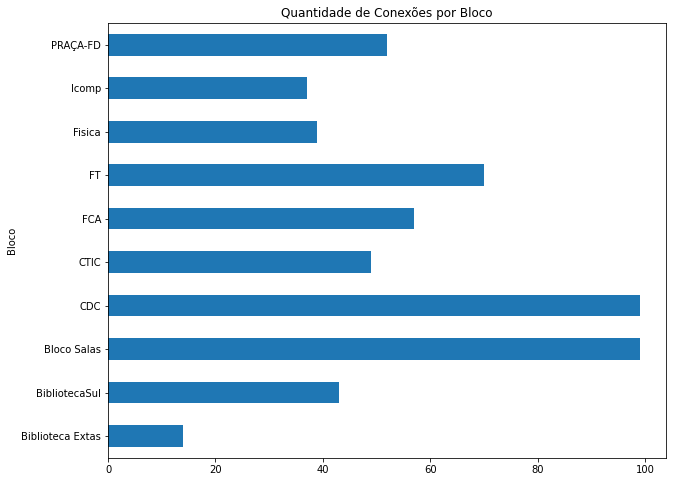

In [16]:
from pylab import *
%matplotlib inline

rede.groupby('Bloco')['Conexoes'].sum().plot(kind = 'barh', figsize = (10,8),title = 'Quantidade de Conexões por Bloco')
plt.show()


In [17]:


mapa2 = folium.Map(location = [-3.0870614634993263, -59.96316411265892],
                   width = '100%',
                   height = '100%',
                   control_scale=True,
                   zoom_start = 100)



for _, rede in rede.iterrows():
    
    

    
    if rede['Conexoes'] > 0:
    
            folium.Marker(
                location=[rede['Longitude'], rede['Latitude']],
                popup='Dispositivos Conectados: {}'.format(rede['Conexoes']),
                tooltip='<strong>' + rede['Bloco'] +" "+ rede['Andar'] +" "+ rede['AP']+'<strong>',
                icon=folium.Icon(color='green',icon='mobile', prefix='fa') 
            ).add_to(mapa2)

    else :
        
        folium.Marker(
                location=[rede['Longitude'], rede['Latitude']],
                popup= '<strong>' +"AP OffLine"+'<strong>',
                tooltip= '<strong>' +rede['Andar'] +" "+ rede['AP']+'<strong>',
                icon=folium.Icon(color='black',icon='mobile', prefix='fa'),
                
            ).add_to(mapa2)





In [18]:
rede2 = pd.read_csv('dadosRede.csv')

coordenadas = rede2[['Longitude','Latitude','Conexoes']]




In [19]:


    
mapa2 = mapa2.add_child(plugins.HeatMap(coordenadas, min_opacity= 0.2,
                   max_val=coordenadas["Conexoes"].max(),
                   radius = 50,blur=50,                     
                   max_zoom= 1,))        

mapa2


In [20]:
mapa2.save('mapa2_RSF.html')
